### Predicting Christmas Movie Grossings

#### Background

Picture leveraging the prowess of data science to reveal the latent possibilities of films even before they debut in theaters! As a data scientist  employed by a progressive cinema, you are leading an exciting initiative: developing an advanced system that not only predicts movie revenues but also revolutionizes the entire landscape of film profitability. This goes beyond simple numerical forecasts; it involves blending creativity with analyticalinsights to redefine how movies are marketed, chosen, and celebrated.

Your task? Design a predictive model that delves into every aspect of a movie - from its title and duration to its genre, 
captivating synopsis, and star-studded cast. And what better way to infuse some festive charm into this project than by 
focusing on a dataset overflowing with Christmas-themed films? With a highly-anticipated Christmas movie set to debut soon, 
the cinema has reservations. It seeks your expertise to forecast its success, enabling it to determine whether to proceed 
with the screening or not. This presents a unique opportunity to merge the joy of the holiday season with the precision of
data science, generating insights that could steer the success of future blockbusters. Are you prepared to embark on this 
cinematic journey?

Predict the gross of this movie.

Title: The Magic of Bellmonte Lane

Description:
"The Magic of Bellmonte Lane" is a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a
holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers
an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate
developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and 
holiday cheer in a story about community, hope, and magic.

Director: Greta Gerwig

Cast:

Emma Thompson as Emily, a kind-hearted and curious woman
Ian McKellen as Mr. Grayson, the stern corporate developer
Tom Hanks as George, the wise and elderly owner of the local cafe
Zoe Saldana as Sarah, Emily's supportive best friend
Jacob Tremblay as Timmy, a young boy with a special Christmas wish
Runtime: 105 minutes

Genres: Family, Fantasy, Romance, Holiday

Production budget: $25M

### data source
https://www.kaggle.com/datasets/mkbari/holiday-blockbuster?select=christmas_movies.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir('C:\\Users\\DELL\\Desktop\\my work')

In [3]:
top1k_movies = pd.read_csv("imdb_top1k.csv")
movie_budgets = pd.read_csv("movie_budgets.csv")
xmass_movies = pd.read_csv("christmas_movies.csv")

In [4]:
movie_budgets.head()

,year,date,title,production budget
0,2022.0,"Dec 9, 2022",Avatar: The Way of Water,460000000
1,2019.0,"Apr 23, 2019",Avengers: Endgame,400000000
2,2011.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000
3,2015.0,"Apr 22, 2015",Avengers: Age of Ultron,365000000
4,2023.0,"May 17, 2023",Fast X,340000000


In [5]:
top1k_movies.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"


In [6]:
xmass_movies.head()

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",$71.32M
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",$285.76M
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",$260.04M


### Exploring the targets
since our model is aiming at predicting the domestic gross box office earnings of our movie, the 'gross' feature of the 
'xmass_movies' dataset will be our target

In [7]:
df = xmass_movies.copy()
df['gross'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 788 entries, 0 to 787
Series name: gross
Non-Null Count  Dtype 
--------------  ----- 
81 non-null     object
dtypes: object(1)
memory usage: 6.3+ KB


Only less than 10% of the movies dont have a gross value, lets drop them and look at the remaining

In [8]:
df = df.dropna(subset='gross').reset_index(drop=True)

In [9]:
df.gross.head()

0     $59.70M
1     $71.32M
2    $285.76M
3    $260.04M
4    $173.40M
Name: gross, dtype: object

lets switch the data type to float. and also remove the $ and M and multiply by 1000000

In [10]:
df['gross'] = df.gross.str.removeprefix('$').str.removesuffix('M').astype('float64')*1000000

Now we will take a look at the distribution of the target 'gross'

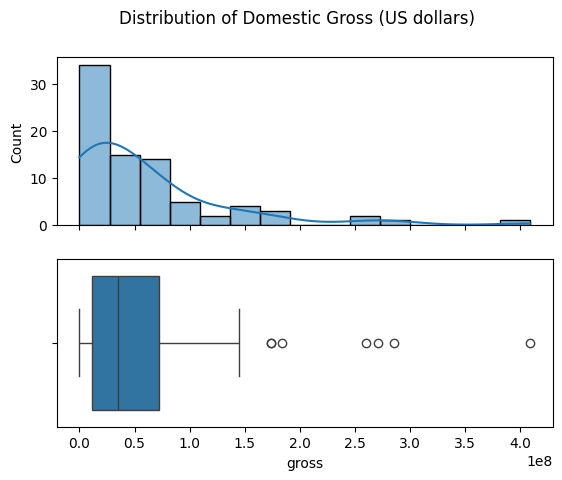

In [11]:
fig, ax = plt.subplots(2,1, sharex=True)
fig.suptitle('Distribution of Domestic Gross (US dollars)')
sns.histplot(df.gross, kde=True, ax=ax[0])
sns.boxplot(df.gross, orient='h', ax=ax[1])
plt.show()

- its a right-skewed distribution with some clear outliers.

Lets look at the top 10 grossing Christmass movies.

In [12]:
df.sort_values('gross', ascending=False)[:10]

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
40,Iron Man 3,2013.0,When Tony Stark's world is torn apart by a for...,Movie,PG-13,130.0,7.1,"Action, Adventure, Sci-Fi",Shane Black,"Robert Downey Jr., Guy Pearce, Gwyneth Paltrow...",409010000.0
2,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",285760000.0
8,The Grinch,2018.0,A grumpy Grinch plots to ruin Christmas for th...,Movie,PG,85.0,6.3,"Animation, Comedy, Family",Yarrow Cheney,"Scott Mosier, Benedict Cumberbatch, Cameron Se...",270620000.0
3,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",260040000.0
10,The Polar Express,2004.0,"On Christmas Eve, a young boy embarks on a mag...",Movie,G,100.0,6.6,"Animation, Adventure, Comedy",Robert Zemeckis,"Tom Hanks, Chris Coppola, Michael Jeter, Lesli...",183370000.0
9,Home Alone 2: Lost in New York,1992.0,One year after Kevin McCallister was left home...,Movie,PG,120.0,6.8,"Adventure, Comedy, Crime",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, Cath...",173590000.0
4,Elf,2003.0,"Raised as an oversized elf, Buddy travels from...",Movie,PG,97.0,7.1,"Adventure, Comedy, Family",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...",173400000.0
11,The Santa Clause,1994.0,When a man inadvertently makes Santa fall off ...,Movie,PG,97.0,6.5,"Comedy, Drama, Family",John Pasquin,"Tim Allen, Judge Reinhold, Wendy Crewson, Eric...",144830000.0
38,Shazam!,2019.0,A newly fostered young boy in search of his mo...,Movie,PG-13,132.0,7.0,"Action, Adventure, Comedy",David F. Sandberg,"Zachary Levi, Mark Strong, Asher Angel, Jack D...",140370000.0
16,The Santa Clause 2,2002.0,Scott Calvin has been a humble Santa Claus for...,Movie,G,104.0,5.7,"Comedy, Family, Fantasy",Michael Lembeck,"Tim Allen, Spencer Breslin, Elizabeth Mitchell...",139240000.0


- Iron Man 3 is so far the highest grossing. but is it really a christmass movie? this is debatable but we will leave this for now.

Lets look at the bottom 5 grossing

In [13]:
df.sort_values('gross')[:5]

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
66,Too Close For Christmas,2020.0,A woman's feelings start to change when she re...,Movie,G,88.0,5.7,"Drama, Romance",Ernie Barbarash,"Chad Michael Murray, Jessica Lowndes, Vanessa ...",10000.0
77,Christmas in Wonderland,2006.0,Three children and their father move from Los ...,Movie,PG,95.0,4.7,"Comedy, Crime, Family",James Orr,"Matthew Knight, Chris Kattan, Cameron Bright, ...",80000.0
72,Rudolph the Red-Nosed Reindeer: The Movie,1998.0,It's up to Santa's most famous reindeer to sav...,Movie,G,83.0,5.8,"Animation, Adventure, Family",William R. Kowalchuk Jr.,"John Goodman, Bob Newhart, Debbie Reynolds, Er...",110000.0
73,Tokyo Godfathers,2003.0,"On Christmas Eve, three homeless people living...",Movie,PG-13,92.0,7.8,"Animation, Adventure, Comedy",Satoshi Kon,"Tôru Emori, Yoshiaki Umegaki, Aya Okamoto, Shô...",130000.0
58,Remember the Night,1940.0,Love blooms between a sympathetic attorney and...,Movie,Passed,94.0,7.6,"Comedy, Drama, Romance",Mitchell Leisen,"Barbara Stanwyck, Fred MacMurray, Beulah Bondi...",170000.0


- Too Close for christmass ans christmass in wonderland did not do well! 
- it also makes sense that some older movies like Remember the Night would be towards the bottom.

lets look at the dataset features

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         81 non-null     object 
 1   release_year  81 non-null     float64
 2   description   81 non-null     object 
 3   type          81 non-null     object 
 4   rating        81 non-null     object 
 5   runtime       81 non-null     float64
 6   imdb_rating   81 non-null     float64
 7   genre         81 non-null     object 
 8   director      81 non-null     object 
 9   stars         81 non-null     object 
 10  gross         81 non-null     float64
dtypes: float64(4), object(7)
memory usage: 7.1+ KB


In [15]:
df.describe(include='all')

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
count,81,81.000000,81,81,81,81.000000,81.000000,81,81,81,8.100000e+01
unique,78,NaN,81,1,8,NaN,NaN,41,76,81,NaN
top,Little Women,NaN,Follows the lives of eight very different coup...,Movie,PG,NaN,NaN,"Comedy, Drama, Romance",Chris Columbus,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",NaN
freq,3,NaN,1,81,28,NaN,NaN,8,3,1,NaN
mean,NaN,1991.567901,NaN,NaN,NaN,102.938272,6.643210,NaN,NaN,NaN,5.956111e+07
std,NaN,24.797146,NaN,NaN,NaN,16.631556,1.100561,NaN,NaN,NaN,7.392150e+07
min,NaN,1925.000000,NaN,NaN,NaN,26.000000,1.300000,NaN,NaN,NaN,1.000000e+04
25%,NaN,1985.000000,NaN,NaN,NaN,93.000000,5.900000,NaN,NaN,NaN,1.166000e+07
50%,NaN,1998.000000,NaN,NaN,NaN,101.000000,6.800000,NaN,NaN,NaN,3.503000e+07
75%,NaN,2008.000000,NaN,NaN,NaN,113.000000,7.500000,NaN,NaN,NaN,7.211000e+07


- type has only one value, so it is safe to remove and also since we donot know the imbd_rating of our movie, its also safe to remove
- for director and stars we will need to do some feature engineering and possibly pull in data from the other datasets to make them more useful.
- since there are 81 unique genre combinations we should split the genres out separately and create features for the ones that appear most.
- description will requre some NLP to become more helpful.

In [16]:
df = df.drop(['imdb_rating', 'type'], axis=1)

#### Rating
lets look at the rating feature to see if it will be helpful predictor of our target


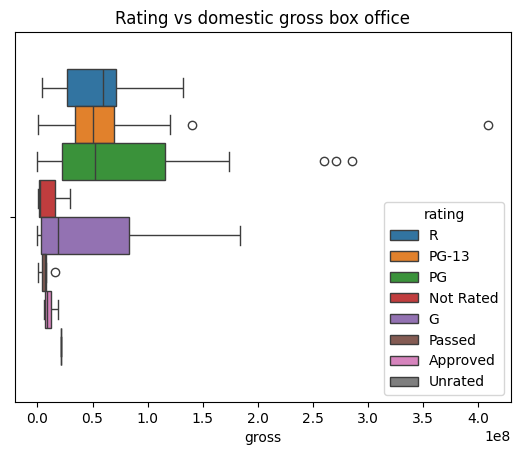

In [17]:
sns.boxplot(data=df, x='gross', hue='rating')
plt.title('Rating vs domestic gross box office')
plt.show()

- it doesnt look like the different rating categories might separate out some in relation to the target. some of the ratings only have 
a few movies

In [18]:
df.rating.value_counts()

rating
PG           28
PG-13        15
G            13
R            11
Passed        6
Approved      4
Not Rated     3
Unrated       1
Name: count, dtype: int64

- probably no need to keep the non-standard ratings with just a few movies in the dataset. lets encode this feature.

In [19]:
df = pd.get_dummies(df, columns=['rating'])
df = df.drop(['rating_Not Rated', 'rating_Unrated', 'rating_Passed', 'rating_Approved'], axis=1)
df.columns

Index(['title', 'release_year', 'description', 'runtime', 'genre', 'director',
       'stars', 'gross', 'rating_G', 'rating_PG', 'rating_PG-13', 'rating_R'],
      dtype='object')

#### Genre feature
now we will do something similar with the genre feature, except it will need to split out a bit differently because
multiple genres are assigned to a single movie

In [20]:
genre_set = set()
for i in range(len(df)):
    for j in df.iloc[i].genre.split(','):
        g = j.strip().lower()
        df[g] = 0
        genre_set.add(g)
        
for i in range(len(df)):
    for j in df.iloc[i].genre.split(','):
        g = j.strip().lower()
        df.loc[i, g] =1
        
genre_list = list(genre_set)
df = df.drop('genre', axis=1)

genre_count = pd.Series(df[genre_list].sum(), name='count')
genre_count.sort_values(ascending=False)

comedy       58
drama        37
family       34
romance      20
adventure    18
fantasy      16
animation     9
crime         7
action        5
music         4
musical       3
thriller      2
mystery       2
sci-fi        1
biography     1
short         1
horror        1
Name: count, dtype: int64

- lets keep the genre features with 5 or more movies

In [21]:
genre_remove = genre_count.sort_values(ascending=False)[genre_count<5].index
df = df.drop(genre_remove, axis=1)
df.columns

Index(['title', 'release_year', 'description', 'runtime', 'director', 'stars',
       'gross', 'rating_G', 'rating_PG', 'rating_PG-13', 'rating_R', 'comedy',
       'drama', 'romance', 'family', 'fantasy', 'adventure', 'action',
       'animation', 'crime'],
      dtype='object')

#### Runtime
Next we'll se if there appears to be any correlation between runtime and the target

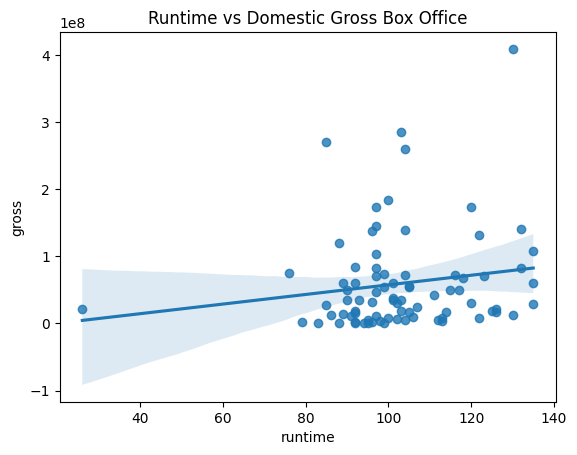

In [22]:
sns.regplot(data=df, x='runtime', y='gross', order=1)
plt.title('Runtime vs Domestic Gross Box Office')
plt.show()

- there maybe a slight linear correlation and possibly some none-linear correlation as well. Hopefully our model will be able to pick up on this

#### Release Year
Now lets explore the release year

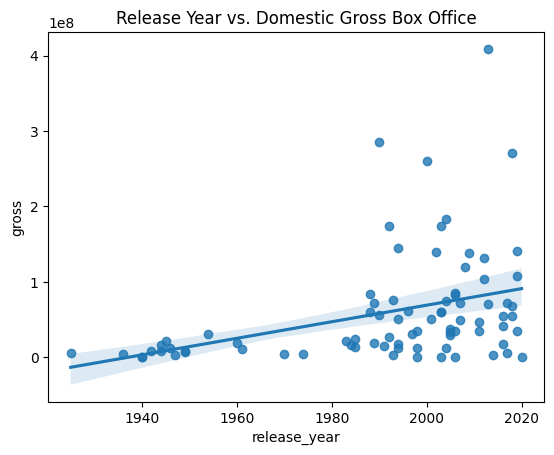

In [23]:
sns.regplot(data=df, x='release_year', y='gross',order=1)
plt.title('Release Year vs. Domestic Gross Box Office')
plt.show()

- there is a correlation with a bit of exponential rise starting around the year 2000
- to make most of the release_year feature, lets pull some data from other datasets.
- specifically, lets make a mean_budget_per_year feature and a mean_gross_per_year_feature. this will help our model to
compensate for the changing scale of movie budgets and earnings throughout time.


#### Movie Budgets feature

In [24]:
movie_budgets.head(3)

,year,date,title,production budget
0,2022.0,"Dec 9, 2022",Avatar: The Way of Water,460000000
1,2019.0,"Apr 23, 2019",Avengers: Endgame,400000000
2,2011.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000


In [25]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               6328 non-null   float64
 1   date               6440 non-null   object 
 2   title              6440 non-null   object 
 3   production budget  6440 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 201.4+ KB


In [26]:
year_budget = movie_budgets[['year','production budget']]
year_budget = year_budget.dropna(subset='year')
year_budget['year'] = year_budget.year.astype('int').astype('object')
year_budget = year_budget.groupby('year').mean().reset_index().rename(columns={'year':'release_year', 
                                                                               'production budget' : 'mean_budget_per_year'})
year_budget.head()

,release_year,mean_budget_per_year
0,1915,110000.0
1,1916,292953.5
2,1920,100000.0
3,1925,2072500.0
4,1927,2000000.0


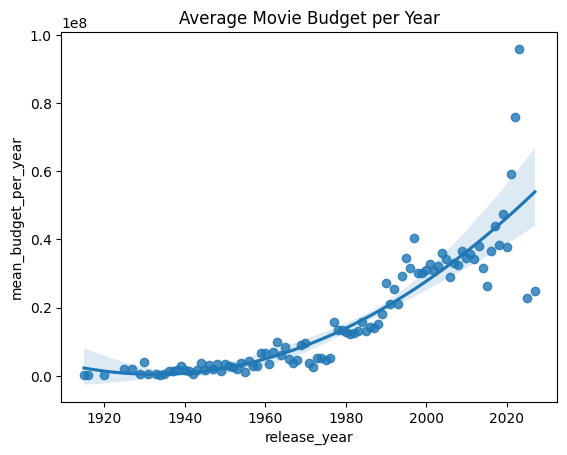

In [27]:
sns.regplot(data=year_budget, x='release_year', y='mean_budget_per_year', order=2)
plt.title("Average Movie Budget per Year")
plt.show()

- this clearly captures the exponential rise in movie budgets.
- lets bring this feature into our dataset by joining it on the release_year of our xmass_movies dataset

In [28]:
df = pd.merge(df, year_budget, how='left', on='release_year')

lets also bring the production budget from the movie_budget dataset

In [29]:
df = pd.merge(df, movie_budgets[['title', 'production budget']], how='left', on='title')

In [30]:
df['production budget'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 85 entries, 0 to 84
Series name: production budget
Non-Null Count  Dtype  
--------------  -----  
46 non-null     float64
dtypes: float64(1)
memory usage: 812.0 bytes


- over half of the production budget feature is null. this could be a combination of christmass movies missing from 
the dataset and the title not matching exactly between the two datasets.
- lets fill the null production budget values with the mean_budget_per_year.

In [31]:
df['production budget'] = df['production budget'].combine_first(df['mean_budget_per_year'])

In [32]:
# xmass movies production budgets median 
df[['production budget', 'gross']].agg({'mean', 'median'})

,production budget,gross
mean,3.383678e+07,5.875471e+07
median,2.800000e+07,3.503000e+07


- with the budget feature in place, lets plot it vs our target

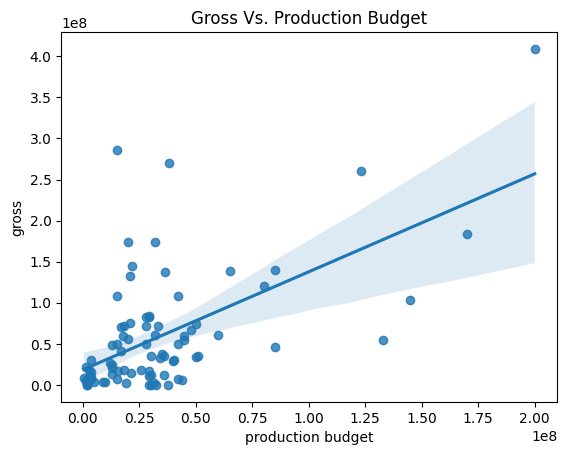

In [33]:
#production_budget_gross_plot
sns.regplot(data=df, x='production budget', y='gross')
plt.title('Gross Vs. Production Budget')
plt.show()

In [34]:
product_budget_gross_plot = df

- it does have the expected correlation. the more money in, the more money out. when we have our predicted gross later,
we can see where it lands in relation to other christmass movies on this plot to determine if it is over or underperforming
based on its budget

### IMBD top 1k Data
 lets move on to the director feature. we shall use the top1k_movies.csv to get this data.
- with this feature we can make a feature of the average amount the director grossed on thier movies. To make it less sensitive to the year the
   movies were made, we'll create a mean_gross_per_year feature that will be the average amount of movies grossed per given year.

In [35]:
top1k_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  Gross          831 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


- we have null values in Gross.

In [36]:
print(top1k_movies.Gross.head())

0     28,341,469
1    134,966,411
2    534,858,444
3     57,300,000
4      4,360,000
Name: Gross, dtype: object


- We should make Gross a float

In [37]:
top1k_movies['Gross'] = top1k_movies.Gross.str.replace(',', '').astype('float64')

We make mean gross per year

In [38]:
mean_gross_per_year = top1k_movies[['Released_Year', 'Gross']]
mean_gross_per_year['Released_Year'] = mean_gross_per_year.Released_Year.replace('PG','1995').astype('int').astype('object')
mean_gross_per_year = mean_gross_per_year.groupby('Released_Year').mean().reset_index().rename(columns=({'Released_Year':'release_year',
                                                                                                        'Gross':'mean_gross_per_year'}))

mean_gross_per_year = mean_gross_per_year.fillna(method='bfill')
mean_gross_per_year = mean_gross_per_year.fillna(method='ffill')

top1k_movies['Released_Year'] = top1k_movies.Released_Year.replace('PG', '1995').astype('int').astype('object')
top1k_movies = top1k_movies.rename(columns={'Released_Year':'release_year'})

top1k_movies = pd.merge(top1k_movies, mean_gross_per_year, how='left', on='release_year')
mean_gross_per_year.head()

,release_year,mean_gross_per_year
0,1920,5450000.0
1,1921,5450000.0
2,1922,977375.0
3,1924,977375.0
4,1925,2750485.0


Merge this data to main dataset, then we can make the mean_gross_by_director

In [39]:
df = pd.merge(df, mean_gross_per_year, how='left', on='release_year')
df.head()

,title,release_year,description,runtime,director,stars,gross,rating_G,rating_PG,rating_PG-13,...,romance,family,fantasy,adventure,action,animation,crime,mean_budget_per_year,production budget,mean_gross_per_year
0,Love Actually,2003.0,Follows the lives of eight very different coup...,135.0,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",59700000.0,False,False,False,...,1,0,0,0,0,0,0,3.234989e+07,4.500000e+07,7.080961e+07
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,97.0,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",71320000.0,False,False,True,...,0,0,0,0,0,0,0,1.826114e+07,1.826114e+07,7.814139e+07
2,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",103.0,Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",285760000.0,False,True,False,...,0,1,0,0,0,0,0,2.719433e+07,1.500000e+07,9.478608e+07
3,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",104.0,Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",260040000.0,False,True,False,...,0,1,1,0,0,0,0,3.116793e+07,1.230000e+08,5.333543e+07
4,Elf,2003.0,"Raised as an oversized elf, Buddy travels from...",97.0,Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...",173400000.0,False,True,False,...,0,1,0,1,0,0,0,3.234989e+07,3.200000e+07,7.080961e+07


#### Director feature
To make the mean gross by director feature, we will need to add the gross made per movie ( weighted by the mean_gross_per_year),
group that by director and then calculate the mean.

In [40]:
director_gross_calculate = top1k_movies[['Director', 'Gross', 'mean_gross_per_year']]
top1k_movies['weighted_gross'] = top1k_movies['Gross'] / top1k_movies['mean_gross_per_year']

director_gross_calculate = top1k_movies[['Director', 'weighted_gross']]
mean_gross_by_director = director_gross_calculate.groupby(['Director']).mean().reset_index().rename(columns={'Director':'director',
                                                                                                             'weighted_gross':'mean_gross_by_director'})
mean_gross_by_director.head()

,director,mean_gross_by_director
0,Aamir Khan,0.031240
1,Aaron Sorkin,NaN
2,Abdellatif Kechiche,0.046206
3,Abhishek Chaubey,NaN
4,Abhishek Kapoor,0.023580


- lets make the null values  the mean over the whole dataset

In [41]:
mean_gross_by_director['mean_gross_by_director'] = mean_gross_by_director.mean_gross_by_director.mask(
    mean_gross_by_director.mean_gross_by_director.isnull(),
    mean_gross_by_director.mean_gross_by_director.mean())

mean_gross_by_director.head(10)                                                                                                                                                                                                        

,director,mean_gross_by_director
0,Aamir Khan,0.031240
1,Aaron Sorkin,0.865599
2,Abdellatif Kechiche,0.046206
3,Abhishek Chaubey,0.865599
4,Abhishek Kapoor,0.023580
5,Adam Elliot,0.865599
6,Adam McKay,0.656278
7,Aditya Chopra,0.865599
8,Aditya Dhar,0.022474
9,Akira Kurosawa,0.478321


- now we merge this to the Christmass movies data

In [42]:
df = pd.merge(df,mean_gross_by_director, how='left', on='director')
# updating any null values with the mean value of the feature
df['mean_gross_by_director'] = df.mean_gross_by_director.mask(
    df.mean_gross_by_director.isnull(),
    df.mean_gross_by_director.mean())
df = df.drop('director', axis=1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   85 non-null     object 
 1   release_year            85 non-null     float64
 2   description             85 non-null     object 
 3   runtime                 85 non-null     float64
 4   stars                   85 non-null     object 
 5   gross                   85 non-null     float64
 6   rating_G                85 non-null     bool   
 7   rating_PG               85 non-null     bool   
 8   rating_PG-13            85 non-null     bool   
 9   rating_R                85 non-null     bool   
 10  comedy                  85 non-null     int64  
 11  drama                   85 non-null     int64  
 12  romance                 85 non-null     int64  
 13  family                  85 non-null     int64  
 14  fantasy                 85 non-null     int6

#### Stars Feature aka starpower
we will engineer a feature with the current stars feature, because we will need to separate
out the stars and search through their movies in the top1k_movies dataset individually.
- we call the feature starpower

In [44]:
df['starpower']=0
for i in range(len(df)):
    movie_actor_gross = 0
    movie_count = 0
    for j in df.iloc[i].stars.strip().split(','):
        a=j.strip()
        actor_gross = 0
        count = 0

        try:
            actor_gross += top1k_movies.query('Star1 == @a').groupby('Star1').mean('weighted_gross').weighted_gross.values[0]
            count += 1
        except:
            pass
        try:
            actor_gross += top1k_movies.query('Star2 == @a').groupby('Star2').mean('weighted_gross').weighted_gross.values[0]
            count += 1
        except:
            pass        

        try:
            actor_gross += top1k_movies.query('Star3 == @a').groupby('Star3').mean('weighted_gross').weighted_gross.values[0]
            count += 1
        except:
            pass

        try:
            actor_gross += top1k_movies.query('Star4 == @a').groupby('Star4').mean('weighted_gross').weighted_gross.values[0]
            count += 1
        except:
            pass
            
        try:
            movie_actor_gross += actor_gross / count
            movie_count += 1
        except:
            pass
            
    try:
        starpower = movie_actor_gross / movie_count
        df['starpower'].iloc[i] = starpower
    except:
        df['starpower'].iloc[i] = np.nan

df.head(3)


,title,release_year,description,runtime,stars,gross,rating_G,rating_PG,rating_PG-13,rating_R,...,fantasy,adventure,action,animation,crime,mean_budget_per_year,production budget,mean_gross_per_year,mean_gross_by_director,starpower
0,Love Actually,2003.0,Follows the lives of eight very different coup...,135.0,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",59700000.0,False,False,False,True,...,0,0,0,0,0,3.234989e+07,4.500000e+07,7.080961e+07,0.321871,1.627527
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,97.0,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",71320000.0,False,False,True,False,...,0,0,0,0,0,1.826114e+07,1.826114e+07,7.814139e+07,1.243481,0.181161
2,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",103.0,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",285760000.0,False,True,False,False,...,0,0,0,0,0,2.719433e+07,1.500000e+07,9.478608e+07,3.399697,2.603982


- we shall replace the nulls with the mean over the feature

In [45]:
df['starpower'] = df.starpower.mask(df.starpower.isnull(), df.starpower.mean())
df = df.drop('stars', axis=1)

In [46]:
df.starpower.mean()

1.5174874834002892

#### starpower calculator
we can use the setup of this feature to make a starpower calculator. then we'll use the calculatoe to see how the star power
of our movie compares to the other Christmass movies.

In [47]:
def starpower_calculator( stars = 'Tom Hanks'):
    starpower = 0
    starpower_mean = 1.517
    movie_actor_gross = 0
    movie_count = 0
    for j in stars.strip().split(','):
        a = j.strip()
        actor_gross = 0
        count = 0
        try:
            actor_gross += top1k_movies.query('Star1 == @a').groupby('Star1').mean('weighted_gross').weighted_gross.values[0]
            count += 1
        except:
            pass
        try:
            actor_gross += top1k_movies.query('Star2 == @a').groupby('Star2').mean('weighted_gross').weighted_gross.values[0]
            count += 1
        except:
            pass        

        try:
            actor_gross += top1k_movies.query('Star3 == @a').groupby('Star3').mean('weighted_gross').weighted_gross.values[0]
            count += 1
        except:
            pass

        try:
            actor_gross += top1k_movies.query('Star4 == @a').groupby('Star4').mean('weighted_gross').weighted_gross.values[0]
            count += 1
        except:
            pass
            
        try:
            movie_actor_gross += actor_gross / count
            movie_count += 1
        except:
            pass
            
    try:
        starpower = movie_actor_gross / movie_count
    except:
        starpower = starpower_mean
    return starpower

starpower_calculator(stars ='Emma Thompson, Ian Mckellen, Tom Hanks, Zoe Saldana, Jacob Tremblay')

2.2068217966922647

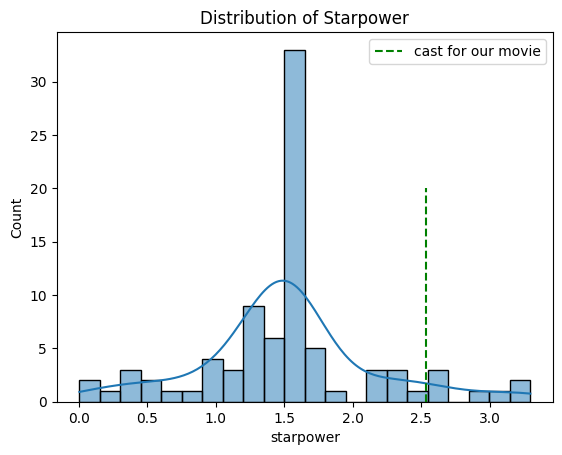

In [48]:
sns.histplot(df['starpower'], kde=True)
plt.vlines(x=2.533, ymin=0, ymax=20, linestyle='dashed',
           colors='g', label='cast for our movie')
plt.legend()
plt.title('Distribution of Starpower');

#### NLP features: Description and title
finally our description of the movies. For this lets find the similarity a movie has with other movies in the 
dataset using the spaCy library.
- we can then take the mean gross of the top 5 matches of each of the movies.
- we shall stick with the Christmass movies to capture any impact the christmasy description might have on the gross.

In [49]:
import spacy


In [50]:
nlp = spacy.load('en_core_web_sm')
similarity_dict = {}

for i in range(len(df.description)):
    similarity_list = []
    for j in range(len(df.description)):
        if i != j:
            movie_a_doc = nlp(df.description[i])
            movie_b_doc = nlp(df.description[j])
        else:
            continue

        similarity_list.append(movie_a_doc.similarity(movie_b_doc))
    similarity_dict.update({i:similarity_list})

similarity_df = pd.DataFrame(similarity_dict).reset_index()

df['weighted_gross'] = df['gross'] / df['mean_gross_per_year']
df['similar_description'] = 0

for i in range(len(df)):
    df['similar_description'].iloc[i] = df.iloc[similarity_df[i].sort_values(ascending=False)[:5].index].weighted_gross.mean()

df = df.drop(['weighted_gross', 'description'], axis=1)
df.head()

,title,release_year,runtime,gross,rating_G,rating_PG,rating_PG-13,rating_R,comedy,drama,...,adventure,action,animation,crime,mean_budget_per_year,production budget,mean_gross_per_year,mean_gross_by_director,starpower,similar_description
0,Love Actually,2003.0,135.0,59700000.0,False,False,False,True,1,1,...,0,0,0,0,3.234989e+07,4.500000e+07,7.080961e+07,0.321871,1.627527,0.453397
1,National Lampoon's Christmas Vacation,1989.0,97.0,71320000.0,False,False,True,False,1,0,...,0,0,0,0,1.826114e+07,1.826114e+07,7.814139e+07,1.243481,0.181161,1.547024
2,Home Alone,1990.0,103.0,285760000.0,False,True,False,False,1,0,...,0,0,0,0,2.719433e+07,1.500000e+07,9.478608e+07,3.399697,2.603982,2.819629
3,How the Grinch Stole Christmas,2000.0,104.0,260040000.0,False,True,False,False,1,0,...,0,0,0,0,3.116793e+07,1.230000e+08,5.333543e+07,1.348509,2.150113,2.978970
4,Elf,2003.0,97.0,173400000.0,False,True,False,False,1,0,...,1,0,0,0,3.234989e+07,3.200000e+07,7.080961e+07,2.960991,1.605382,1.633429


- it worked well
- we shall do the same for the titles

In [51]:
similarity_dict = {}
for i in range(len(df.title)):
    similarity_list = []
    for j in range(len(df.title)):
        if i != j:
            movie_a_doc = nlp(df.title[i])
            movie_b_doc = nlp(df.title[j])
        else:
            continue

        similarity_list.append(movie_a_doc.similarity(movie_b_doc))
    similarity_dict.update({i:similarity_list})

similarity_df = pd.DataFrame(similarity_dict).reset_index()

df['weighted_gross'] = df['gross'] / df['mean_gross_per_year']
df['similar_title'] = 0

for i in range(len(df)):
    df['similar_title'].iloc[i] = df.iloc[similarity_df[i].sort_values(ascending=False)[:5].index].weighted_gross.mean()

df = df.drop(['weighted_gross', 'title', 'release_year'], axis=1)
df.head()

,runtime,gross,rating_G,rating_PG,rating_PG-13,rating_R,comedy,drama,romance,family,...,action,animation,crime,mean_budget_per_year,production budget,mean_gross_per_year,mean_gross_by_director,starpower,similar_description,similar_title
0,135.0,59700000.0,False,False,False,True,1,1,1,0,...,0,0,0,3.234989e+07,4.500000e+07,7.080961e+07,0.321871,1.627527,0.453397,3.847648
1,97.0,71320000.0,False,False,True,False,1,0,0,0,...,0,0,0,1.826114e+07,1.826114e+07,7.814139e+07,1.243481,0.181161,1.547024,3.362656
2,103.0,285760000.0,False,True,False,False,1,0,0,1,...,0,0,0,2.719433e+07,1.500000e+07,9.478608e+07,3.399697,2.603982,2.819629,0.849918
3,104.0,260040000.0,False,True,False,False,1,0,0,1,...,0,0,0,3.116793e+07,1.230000e+08,5.333543e+07,1.348509,2.150113,2.978970,0.391015
4,97.0,173400000.0,False,True,False,False,1,0,0,1,...,0,0,0,3.234989e+07,3.200000e+07,7.080961e+07,2.960991,1.605382,1.633429,4.217136


In [52]:
bool = df.select_dtypes(include=['bool']).columns.tolist()
df[bool] = ((df[bool]==False).astype(int))
df.head(25)

,runtime,gross,rating_G,rating_PG,rating_PG-13,rating_R,comedy,drama,romance,family,...,action,animation,crime,mean_budget_per_year,production budget,mean_gross_per_year,mean_gross_by_director,starpower,similar_description,similar_title
0,135.0,59700000.0,1,1,1,0,1,1,1,0,...,0,0,0,3.234989e+07,4.500000e+07,7.080961e+07,0.321871,1.627527,0.453397,3.847648
1,97.0,71320000.0,1,1,0,1,1,0,0,0,...,0,0,0,1.826114e+07,1.826114e+07,7.814139e+07,1.243481,0.181161,1.547024,3.362656
2,103.0,285760000.0,1,0,1,1,1,0,0,1,...,0,0,0,2.719433e+07,1.500000e+07,9.478608e+07,3.399697,2.603982,2.819629,0.849918
3,104.0,260040000.0,1,0,1,1,1,0,0,1,...,0,0,0,3.116793e+07,1.230000e+08,5.333543e+07,1.348509,2.150113,2.978970,0.391015
4,97.0,173400000.0,1,0,1,1,1,0,0,1,...,0,0,0,3.234989e+07,3.200000e+07,7.080961e+07,2.960991,1.605382,1.633429,4.217136
5,130.0,12200000.0,1,0,1,1,0,1,0,1,...,0,0,0,3.242200e+06,3.180000e+06,1.355133e+07,0.568457,1.517487,1.922075,0.966248
6,120.0,30000000.0,1,1,1,1,1,0,1,0,...,0,0,0,3.636667e+06,3.636667e+06,1.166148e+07,1.000000,1.517487,3.572922,0.913373
7,132.0,83010000.0,1,1,1,0,0,0,0,0,...,1,0,0,1.518182e+07,2.800000e+07,6.061672e+07,1.627818,1.320762,6.834655,1.365836
8,85.0,270620000.0,1,0,1,1,1,0,0,1,...,0,1,0,3.840182e+07,3.840182e+07,1.862684e+08,1.243481,1.517487,1.613647,0.835747
9,120.0,173590000.0,1,0,1,1,1,0,0,0,...,0,0,1,2.536389e+07,2.000000e+07,7.411871e+07,3.399697,2.196566,1.871063,1.023117


#### Transforming for modeling 
lets split the target from the featues and scale the data, before we develop the model.

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
y = df.pop('gross')
X = df.copy()

transformer = StandardScaler()
X = pd.DataFrame(transformer.fit_transform(X),
                columns = transformer.get_feature_names_out())

#### Cross-validation split
- get the indicies for a k-fold cross-validation split.

In [55]:
from sklearn.model_selection import KFold

Kf = KFold(n_splits=5, random_state=0, shuffle=True)
Kf.get_n_splits(X)

cv_indicies = []
for i, (train_index, test_index) in enumerate(Kf.split(X)):
    cv_indicies.append((train_index, test_index))

#### Model selection: GridSearchCV
using the sklearn gridsearchcv to pick and fine tune our model.
- to start with we can see how some of the ensemble methods in sklearn perform.
    

In [56]:
X_features = X.copy()

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor

estimator_list = [AdaBoostRegressor(random_state=0),
                  RandomForestRegressor(random_state=0),
                  ExtraTreesRegressor(random_state=0)]

param_grid = {'n_estimators':[5,10,25,50,100,150,200,250,500]}
best_score_dict = {}

for estimator in estimator_list:
    gs = GridSearchCV(estimator=estimator, 
                      param_grid = param_grid, 
                      cv=cv_indicies,
                      scoring='neg_mean_absolute_error')
    gs.fit(X_features, y)
    best_score_dict.update({estimator:[gs.best_score_, gs.best_params_]})

best_score_dict

{AdaBoostRegressor(random_state=0): [-41016126.14059113, {'n_estimators': 5}],
 RandomForestRegressor(random_state=0): [-39909460.0, {'n_estimators': 500}],
 ExtraTreesRegressor(random_state=0): [-41593585.88235293,
  {'n_estimators': 25}]}

#### Model selection part 2: Fine-Tuning
- it looks like the RandomForestRegressor did the best with a mean absolute error(MSE) of 
39909460.0
- so lets pick that as our estimator and see how we can improve its performance by fine tuning the parameters.
- we will do a few rounds of grid search below.

In [58]:
# param_grid = {'n_estimators':[50,100,250],
#               'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#               'max_depth':[3,5,7],
#               'min_samples_split':[2,3,5],
#               'min_samples_leaf':[1,2,3],
#               'max_features':['sqrt','log2',1]}
# rfr = RandomForestRegressor(random_state=0)

# best_score_dict = {}
# gs = GridSearchCV(estimator=rfr,
#                   param_grid=param_grid,
#                   cv=cv_indicies,
#                   scoring='neg_mean_absolute_error')
# gs.fit(X_features, y)
# best_score_dict.update({rfr:[gs.best_score_, gs.best_params_]})
# best_score_dict

In [59]:
# param_grid = {'n_estimators':[25,50,75],
#               'criterion': ['absolute_error'],
#               'max_depth':[4,5,6],
#               'min_samples_split':[3,4],
#               'min_samples_leaf':[1],
#               'max_features':['sqrt']}
# rfr = RandomForestRegressor(random_state=0)

# best_score_dict = {}
# gs = GridSearchCV(estimator=rfr,
#                   param_grid=param_grid,
#                   cv=cv_indicies,
#                   scoring='neg_mean_absolute_error')
# gs.fit(X_features, y)
# best_score_dict.update({rfr:[gs.best_score_, gs.best_params_]})
# best_score_dict

In [60]:
param_grid = {'n_estimators':[26],
              'criterion': ['absolute_error'],
              'max_depth':[6],
              'min_samples_split':[4],
              'min_samples_leaf':[1],
              'max_features':['sqrt']}
rfr = RandomForestRegressor(random_state=0)

best_score_dict = {}
gs = GridSearchCV(estimator=rfr,
                  param_grid=param_grid,
                  cv=cv_indicies,
                  scoring='neg_mean_absolute_error')
gs.fit(X_features, y)
best_score_dict.update({rfr:[gs.best_score_, gs.best_params_]})
best_score_dict

{RandomForestRegressor(random_state=0): [-37573165.158371046,
  {'criterion': 'absolute_error',
   'max_depth': 6,
   'max_features': 'sqrt',
   'min_samples_leaf': 1,
   'min_samples_split': 4,
   'n_estimators': 26}]}

- ok with a somewahat improved MAE 37573165.158371046, we will go with these parameters for our model
- With the MAE as our metric, whatever our predicted gross earnings are, we may want to add this score
  for a high end estimate.
  - that way we can have some helpful bounds on our prediction.


Next, well look at the feature importance and see how helpful each feature was to our model.
 
#### Feature importance
 

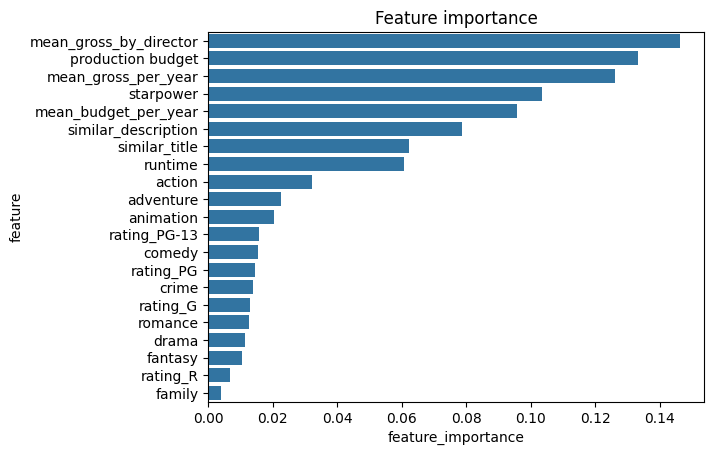

In [61]:
feature_importance_df = pd.DataFrame(gs.best_estimator_.feature_importances_,
                                     index=gs.best_estimator_.feature_names_in_).reset_index()

feature_importance_df = feature_importance_df.rename(columns={'index':'feature', 0:'feature_importance'})

feature_importance_df = feature_importance_df.sort_values('feature_importance', ascending=False)

sns.barplot(data=feature_importance_df, x='feature_importance',
            y= 'feature')
plt.title('Feature importance');

- This is very interesting! the mean_gross_by_director ends up being the most important feature in our model.
- The other gross and budget features are also amoungst the most helpful as well.
- Both NLP features similar_discription and similar_title also proved somewhat useful.
- starpower was not so important as we had hoped, maybe becauseit averaged across actors in a movie as opposed to the director feature.


#### Predicting with our model
- Now lets put our model to use and predict what our movie might make if released in theaters.
- To do this we will make a function to input a movie and predict its gross. our input will need
  to go through all the processing steps our df did. so the function is quite lengthy.

In [62]:
def christmass_movie_gross_predictor(title='The Magic of Bellmonte Lane',
                                     release_year = 2020,
                                     description = "a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic.",
                                     rating = 'PG',
                                     runtime= 105,
                                     genre = 'Family',
                                     director = 'Greta Gerwig', 
                                     stars = 'Emma Thompson, Ian Mckellen, Tom Hanks, Zoe Saldana, Jacob Tremblay',
                                     budget = 25000000):
    # import necessary libraries
    import pandas as pd
    import numpy as np
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler
    import spacy
    import os
    os.chdir('C:\\Users\\DELL\\Desktop\\my work')

    # read movie data from csv files
    xmas_movies = pd.read_csv("christmas_movies.csv")
    movies_budget = pd.read_csv('movie_budgets.csv')
    top1k_movies = pd.read_csv('imdb_top1k.csv')

    # create a copy of christmass movies data
    df = xmas_movies.copy()

    # Drop rows with missing 'gross' values and reset the index
    df= df.dropna(subset='gross').reset_index(drop=True)

    #Create a dataframe for the movie to predict
    movie_to_predict = pd.DataFrame( {'title' : title,
                                      'release_year': release_year,
                                      'description' : description,
                                      'type': 'Movie',
                                      'runtime': runtime,
                                      'imdb_rating':7.5,
                                      'genre': genre,
                                      'director': director,
                                      'stars': stars,
                                      'gross':'$0M'},
                                    index=[0])
    # concatnate the movie to predict with the existing data
    df = pd.concat([movie_to_predict,df]).reset_index(drop=True)

    # convert gross column to numerical fomart
    df['gross'] = df.gross.str.removeprefix('$').str.removesuffix('M').astype('float64')*1000000

    #drop unnecessary columns
    df = df.drop(['type', 'imdb_rating'], axis=1)

    # one-hot encode the 'rating' column and drop unnecessary columns
    df = pd.get_dummies(df, columns=['rating'])
    df = df.drop(['rating_Not Rated', 'rating_Unrated',
                  'rating_Passed', 'rating_Approved'], axis=1)

    #Extract and one-hot encode genres
    genre_set = set()
    for i in range(len(df)):
        for j in df.iloc[i].genre.split(','):
            g = j.strip().lower()
            df[g] = 0
            genre_set.add(g)
            
    for i in range(len(df)):
        for j in df.iloc[i].genre.split(','):
            g = j.strip().lower()
            df.loc[i, g] =1
            
    genre_list = list(genre_set)
    df = df.drop('genre', axis=1)

    #Remove genres with less than 5 occurences
    genre_count = pd.Series(df[genre_list].sum(), name='count')
    genre_remove = genre_count.sort_values(ascending=False)[genre_count<5].index
    df = df.drop(genre_remove, axis=1)

    # merge with movie budgets data
    year_budget = movies_budget[['year', 'production budget']]
    year_budget = year_budget.dropna(subset='year')
    year_budget['year'] = year_budget.year.astype('int').astype('object')
    year_budget = year_budget.groupby('year').mean().reset_index()\
    .rename(columns={'year':'release_year', 'production budget': 'mean_budget_per_year'})
    df = pd.merge(df, year_budget, how='left', on='release_year')
    df = pd.merge(df, movies_budget[['title' , 'production budget']],
                  how='left', on='title')
    df['production budget'] = df['production budget'].combine_first(df['mean_budget_per_year'])

    # Adding movie budget for target movies:
    df['production budget'].iloc[0] = budget

    # process top1k_movies data for gross calculation
    top1k_movies['Gross'] = top1k_movies.Gross.str.replace(',','').astype('float64')
    mean_gross_per_year = top1k_movies[['Released_Year', 'Gross']]
    mean_gross_per_year['Released_Year'] = mean_gross_per_year.Released_Year.replace('PG','1995')\
    .astype('int').astype('object')
    mean_gross_per_year = mean_gross_per_year.groupby('Released_Year').mean().reset_index().rename\
    (columns=({'Released_Year':'release_year','Gross':'mean_gross_per_year'}))
    
    mean_gross_per_year = mean_gross_per_year.fillna(method='bfill')
    mean_gross_per_year = mean_gross_per_year.fillna(method='ffill')
    
    top1k_movies['Released_Year'] = top1k_movies.Released_Year.replace('PG', '1995').astype('int').astype('object')
    top1k_movies = top1k_movies.rename(columns={'Released_Year':'release_year'})
    
    top1k_movies = pd.merge(top1k_movies, mean_gross_per_year, how='left', on='release_year')
    df = pd.merge(df, mean_gross_per_year, how='left', on='release_year')

    # calculate mean gross by director
    director_gross_calculate = top1k_movies[['Director', 'Gross', 'mean_gross_per_year']]
    top1k_movies['weighted_gross'] = top1k_movies['Gross'] / top1k_movies['mean_gross_per_year']
    
    director_gross_calculate = top1k_movies[['Director', 'weighted_gross']]
    mean_gross_by_director = director_gross_calculate.groupby(['Director']).mean().reset_index()\
    .rename(columns={'Director':'director','weighted_gross':'mean_gross_by_director'})

    mean_gross_by_director['mean_gross_by_director'] = mean_gross_by_director.mean_gross_by_director.mask(
    mean_gross_by_director.mean_gross_by_director.isnull(),
    mean_gross_by_director.mean_gross_by_director.mean())

    df = pd.merge(df,mean_gross_by_director, how='left', on='director')
    
    df['mean_gross_by_director'] = df.mean_gross_by_director.mask(
        df.mean_gross_by_director.isnull(),
        df.mean_gross_by_director.mean())

    df = df.drop('director', axis=1)

    #calculate starpower

    df['starpower']=0
    for i in range(len(df)):
        movie_actor_gross = 0
        movie_count = 0
        for j in df.iloc[i].stars.strip().split(','):
            a=j.strip()
            actor_gross = 0
            count = 0
    
            try:
                actor_gross += top1k_movies.query('Star1 == @a').groupby('Star1').mean('weighted_gross').weighted_gross.values[0]
                count += 1
            except:
                pass
            try:
                actor_gross += top1k_movies.query('Star2 == @a').groupby('Star2').mean('weighted_gross').weighted_gross.values[0]
                count += 1
            except:
                pass        
    
            try:
                actor_gross += top1k_movies.query('Star3 == @a').groupby('Star3').mean('weighted_gross').weighted_gross.values[0]
                count += 1
            except:
                pass
        
            try:
                actor_gross += top1k_movies.query('Star4 == @a').groupby('Star4').mean('weighted_gross').weighted_gross.values[0]
                count += 1
            except:
                pass
                
            try:
                movie_actor_gross += actor_gross / count
                movie_count += 1
            except:
                pass
                
        try:
            starpower = movie_actor_gross / movie_count
            df['starpower'].iloc[i] = starpower
        except:
            df['starpower'].iloc[i] = np.nan

    df['starpower'] = df.starpower.mask(df.starpower.isnull(), df.starpower.mean())
    df = df.drop('stars', axis=1)

    # using spaCy to calculate similarity between movie descriptions
    import spacy
    nlp = spacy.load('en_core_web_sm')
    similarity_dict = {}
    
    for i in range(len(df.description)):
        similarity_list = []
        for j in range(len(df.description)):
            if i != j:
                movie_a_doc = nlp(df.description[i])
                movie_b_doc = nlp(df.description[j])
            else:
                continue
    
            similarity_list.append(movie_a_doc.similarity(movie_b_doc))
        similarity_dict.update({i:similarity_list})
    
    similarity_df = pd.DataFrame(similarity_dict).reset_index()

    # calculate mean gross for movies with similar descriptions
    
    df['weighted_gross'] = df['gross'] / df['mean_gross_per_year']
    df['similar_description'] = 0
    
    for i in range(len(df)):
        df['similar_description'].iloc[i] = df.iloc[similarity_df[i].sort_values(ascending=False)[:5].index].weighted_gross.mean()
    
    df = df.drop(['weighted_gross', 'description'], axis=1)

    #use spacy to calculate similarity between movie titles
    similarity_dict = {}
    for i in range(len(df.title)):
        similarity_list = []
        for j in range(len(df.title)):
            if i != j:
                movie_a_doc = nlp(df.title[i])
                movie_b_doc = nlp(df.title[j])
            else:
                continue
    
            similarity_list.append(movie_a_doc.similarity(movie_b_doc))
        similarity_dict.update({i:similarity_list})
    
    similarity_df = pd.DataFrame(similarity_dict).reset_index()

    #calculate mean gross for movie with similar titles
    
    df['weighted_gross'] = df['gross'] / df['mean_gross_per_year']
    df['similar_title'] = 0
    
    for i in range(len(df)):
        df['similar_title'].iloc[i] = df.iloc[similarity_df[i].sort_values(ascending=False)[:5].index].weighted_gross.mean()
    
    df = df.drop(['weighted_gross', 'title', 'release_year'], axis=1)
    
    #standardize features using StandardScaler
    y = df.pop('gross')
    y = y[1:]
    X = df.copy()

    transformer = StandardScaler()
    X = pd.DataFrame(transformer.fit_transform(X),
                     columns=transformer.get_feature_names_out())

    # separate movie to predict from the dataset
    movie_to_predict = X.iloc[0]
    X = X.iloc[1:]

    # use KFold for cross-validation
    from sklearn.model_selection import KFold

    kf = KFold(n_splits=5, random_state=0, shuffle=True)
    kf.get_n_splits(X)

    cv_indicies = []
    for i, (train_index, test_index) in enumerate(Kf.split(X)):
        cv_indicies.append((train_index, test_index))

    #Define the parameter grid for RandomForestRegressor
    param_grid = {'n_estimators': [26],
                  'criterion': ['absolute_error'],
                  'max_depth':[6],
                  'min_samples_split':[1],
                  'max_features': ['sqrt']}
    gs.fit(X,y)

    #Return the predicted gross for the input movie
    predicted = gs.predict(np.array(movie_to_predict).reshape(1,-1))[0]

    low_predicted = gs.predict(np.array(movie_to_predict).reshape(1,-1))[0] - (-gs.best_score_)

    high_predicted = gs.predict(np.array(movie_to_predict).reshape(1,-1))[0] + (-gs.best_score_)

    return low_predicted, predicted, high_predicted
    
                                             

In [63]:
low_gross, predicted_gross, high_gross = christmass_movie_gross_predictor()
print(f'low_gross: {round(low_gross, -1)} | predicted_gross: {round(predicted_gross, -1)} | high_gross: {round(high_gross, -1)}')

low_gross: 43450320.0 | predicted_gross: 82132120.0 | high_gross: 120813910.0


- our model predicts that 'The Magic of Bellmonte Lane' will gross $82M with alow and high range of 43M and 120M respectively, determined by the MAE score of our model.

#### Check Model Validity
Now lets confirm our model is capturing what we would expect it to intuitively.
- if our movie had an extra large budget, we would expect a higher predicted gross.
- And, if it has only average grossing stars it would not perform as well in the box office.

In [64]:
#big budget
low_gross_big_budget, predicted_gross_big_budget, high_gross_big_budget = christmass_movie_gross_predictor(budget=300000000)
print(f'low_gross_big_budget: {round(low_gross_big_budget, -1)} | predicted_gross_big_budget: {round(predicted_gross_big_budget, -1)} \
| high_gross_big_budget: {round(high_gross_big_budget, -1)}')

low_gross_big_budget: 76116280.0 | predicted_gross_big_budget: 114798080.0 | high_gross_big_budget: 153479870.0


In [65]:
# no stars
low_gross_no_stars, predicted_gross_no_stars, high_gross_no_stars = christmass_movie_gross_predictor(stars = 'None')
print(f'low_gross_no_stars: {round(low_gross_no_stars, -1)} | \
predicted_gross_no_stars: {round(predicted_gross_no_stars, -1)} | \
high_gross_no_stars: {round(high_gross_no_stars, -1)}')

low_gross_no_stars: 24010510.0 | predicted_gross_no_stars: 62692310.0 | high_gross_no_stars: 101374100.0


- the model does behave as expected.
- if our movie had a budget of $300M, we would predict a gross of 115M, which is much grater than the 82M predicted with our 25M budget
- similarly without the high powered cast our movie would only gross 63M.

##### Effect of stars
lets see if we can quantify the impact of Tom Hunks' and Zoe Saldana involvment in the movie has on the predicted gross.

In [66]:
low_gross_no_tomhanks, predicted_gross_no_tomhanks, high_gross_no_tomhanks = christmass_movie_gross_predictor(stars = 'Emma Thompson, Ian Mckellen, Jacob Tremblay')
print(f'low_gross_no_tomhanks: {round(low_gross_no_tomhanks, -1)} | \
predicted_gross_no_tomhanks: {round(predicted_gross_no_tomhanks, -1)} | \
high_gross_no_tomhanks: {round(high_gross_no_tomhanks, -1)}')

low_gross_no_tomhanks: 22837820.0 | predicted_gross_no_tomhanks: 61519620.0 | high_gross_no_tomhanks: 100201410.0


- Tom Hunks and Zoe Saldana not starring in the movie brings down the predicted gross from 82M to 61M, an almost 22M swing with a low gross predicted to be less than production budget.

#### Budget Performance

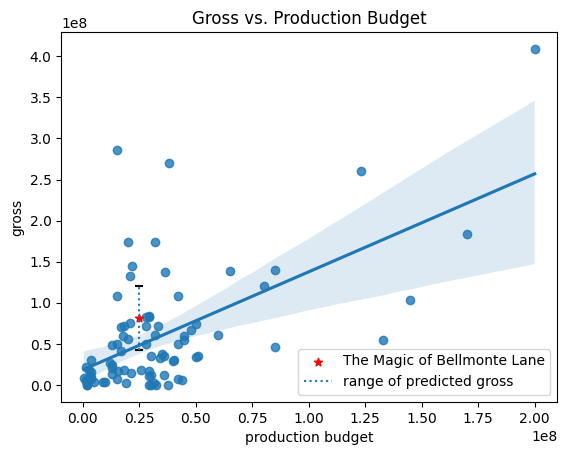

In [67]:
sns.regplot(data=product_budget_gross_plot,
            x='production budget', 
            y='gross')
plt.scatter(x=25000000, y=82000000, color='r',
            marker='*', label='The Magic of Bellmonte Lane')
plt.scatter(x=25000000, y=43000000, color='black',
            marker='_')
plt.scatter(x=25000000, y=120000000, color='black',
            marker='_')
plt.vlines(x=25000000, ymin=43000000, ymax=120000000, linestyle='dotted',
           label = 'range of predicted gross')
plt.legend(loc='lower right')
plt.title('Gross vs. Production Budget')
plt.show()

- This is a very encouraging sign for our movie prospect.
- the entire range of the predicted gross earnings is above the average box office performance of movies with similar budget.

#### Distribution 

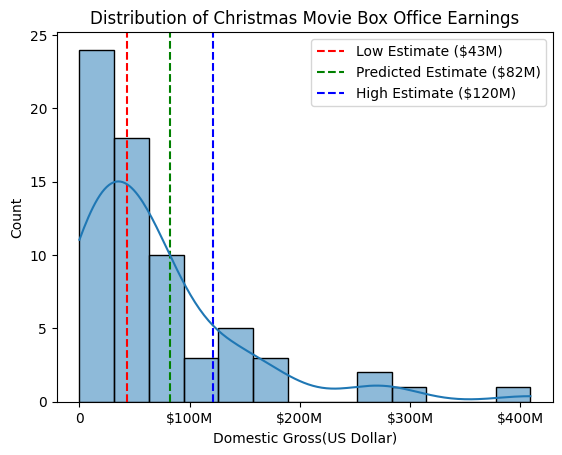

In [68]:
xmass_movies['gross'] = xmass_movies.gross.str.removeprefix('$').str.removesuffix('M').astype('float64')*1000000
xmass_movies['gross']
xmas_movies = xmass_movies[xmass_movies.rating.isin(['G', 'PG', 'PG-13', 'R'])]

plt.axvline(x=low_gross, ymin=0, ymax=20, color='r', linestyle='--', label='Low Estimate ($43M)')
plt.axvline(x=predicted_gross, ymin=0, ymax=20, color='g', linestyle='--', label='Predicted Estimate ($82M)')
plt.axvline(x=high_gross, ymin=0, ymax=20, color='b', linestyle='--', label='High Estimate ($120M)')

sns.histplot(data=xmas_movies['gross'], kde=True, alpha=0.5)
plt.xlabel('Domestic Gross(US Dollar)')
plt.xticks(ticks=[0, 100000000, 200000000,300000000 ,400000000], labels=[0, '$100M', '$200M', '$300M','$400M'])
plt.ylabel('Count')
plt.title('Distribution of Christmas Movie Box Office Earnings')
plt.legend()
plt.show()

#### Wordcloud

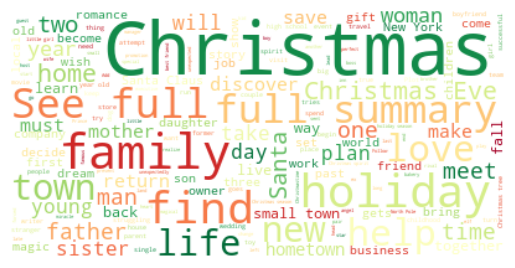

In [69]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = ' '.join(review for review in xmass_movies.description)
stopwords = set(STOPWORDS)

## generate word cloud
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color='white',
                      colormap='RdYlGn').generate(text)

# plot word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Conclusions
'The Magic of Bellmonte Lane' should be released in theater! Our Model predicts it will have a domestic gross box earnings of 82M dollars if released.
It outperforms based on its budget of 25M dollars, which is below the median christmass movie budget of 28M dollars. The low end of our prediction, $43M still puts our movie above median gross of 35M dollars with a potential minimum net earning of 10M dollars. At the high end, our movie could gross upto 120M dollars with a potential net earning of 95M dollars, thanks to Tom Hanks and Zoe Saldana.
#### Recomendations
- There is always room for improvement in the model itself; trying different estimators, fine tuning parameters further,
  engineering additional features etc.
- A big limitation to the model was having a small dataset(less than 100 christmass movies). we compensated for this by pulling data from other datasets provided to enrich our features and the model still could only be accurate. That said, it was accurate enough to capture the expected effect that an increase in budget and star power had on predicting gross earnings.

##### Thankyou for giving my project a detailed look. please feel free to leave a comment or suggestion to mawadripaul111@gmail.com